# RFM Analysis of Retail Store
#### RFM Analysis helps in customer segmentation. Here we will find out the different segments on the basis of rfm scors.With this dataset we will find out the recency (which means how recently customer has made a purchase), frequency ( how many times they comes to store again and again) and monetary (the total amount spent by the customer).

## About Dataset:
InvoiceNo: Invoice number a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. , a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name.

Quantity: The quantities of each product (item) per transaction.

InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Product price per unit in sterling.

CustomerID: a 5-digit integral number uniquely assigned to each customer.

Country: the name of the country where each customer resides.

In [1]:
# importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
# loading the dataset
df = pd.read_csv(r"C:\Users\prate\Downloads\archive (18)\online_retail.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Checking the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [10]:
df[df.UnitPrice <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [12]:
# dropping the values which have zero unit price 
df = df[df['UnitPrice'] != 0]

In [14]:
df[df.Quantity <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [16]:
df['Quantity'] = df['Quantity'].abs()

In [18]:
# checking the null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132605
Country             0
dtype: int64

In [20]:
# here we dropped the null values from the customer id columns since we are performing rfm if we don't have customer id we can't identify the customer 
df = df.dropna(subset = 'CustomerID')

In [22]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [26]:
# dropping the duplicated values
df = df.drop_duplicates(keep='first')

In [30]:
# check the datatypes
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [32]:
# Converting the datatypes
df['CustomerID'] =df['CustomerID'].astype('int')

In [34]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [36]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [38]:
df.Country

0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
541904            France
541905            France
541906            France
541907            France
541908            France
Name: Country, Length: 401564, dtype: object

In [40]:
# checking the lastest date we have in dataset
max_date = df['InvoiceDate'].max()

In [42]:
max_date

Timestamp('2011-12-09 12:50:00')

In [44]:
from datetime import datetime, timedelta

In [46]:
# Creating a refrence date to extract recency of customer
reference_date = max_date + timedelta(days = 1)

In [48]:
reference_date

Timestamp('2011-12-10 12:50:00')

In [50]:
#  Create a new column for TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [52]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


### Creating rfm dataframe

In [54]:
# Grouping by CustomerID to calculate RFM values
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

In [56]:
# Rename the columns to match RFM
rfm.columns = ['recency', 'frequency', 'monetary']

In [58]:
rfm

,recency,frequency,monetary
CustomerID,,,
12346,326,2,154367.20
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40
...,...,...,...
18280,278,1,180.60
18281,181,1,80.82
18282,8,3,179.50


### Customer relationship management and RFM analysis.

In [65]:
from crm_rfm_modeling.rfm import RFM

In [67]:
model = RFM(weights=(0.2, 0.2, 0.6))

In [69]:
model.fit(rfm)

In [71]:
# It provides the five segments of rfm.
pd.DataFrame(model.cutoffs)

,recency,frequency,monetary
0,"(374, 179.0)","(1, 1.0)","(1.25, 247.15)"
1,"(179.0, 71.0)","(1.0, 2.0)","(247.15, 495.77)"
2,"(71.0, 32.0)","(2.0, 4.0)","(495.77, 954.9)"
3,"(32.0, 11.0)","(4.0, 7.0)","(954.9, 2088.87)"
4,"(11.0, 1)","(7.0, 248)","(2088.87, 336942.1)"


In [73]:
df1 =model.fitted_data
df1

,recency,frequency,monetary,recency_scores,frequency_scores,monetary_scores,recency_weighted,frequency_weighted,monetary_weighted
CustomerID,,,,,,,,,
12346,326,2,154367.20,1,2,5,0.2,0.4,3.0
12347,2,7,4310.00,5,4,5,1.0,0.8,3.0
12348,75,4,1797.24,2,3,4,0.4,0.6,2.4
12349,19,1,1757.55,4,1,4,0.8,0.2,2.4
12350,310,1,334.40,1,1,2,0.2,0.2,1.2
...,...,...,...,...,...,...,...,...,...
18280,278,1,180.60,1,1,1,0.2,0.2,0.6
18281,181,1,80.82,1,1,1,0.2,0.2,0.6
18282,8,3,179.50,5,3,1,1.0,0.6,0.6


In [75]:
df1['Total_weightage_score'] = df1['recency_scores'] + df1['frequency_scores'] + df1['monetary_scores']

In [77]:
df1

,recency,frequency,monetary,recency_scores,frequency_scores,monetary_scores,recency_weighted,frequency_weighted,monetary_weighted,Total_weightage_score
CustomerID,,,,,,,,,,
12346,326,2,154367.20,1,2,5,0.2,0.4,3.0,8
12347,2,7,4310.00,5,4,5,1.0,0.8,3.0,14
12348,75,4,1797.24,2,3,4,0.4,0.6,2.4,9
12349,19,1,1757.55,4,1,4,0.8,0.2,2.4,9
12350,310,1,334.40,1,1,2,0.2,0.2,1.2,4
...,...,...,...,...,...,...,...,...,...,...
18280,278,1,180.60,1,1,1,0.2,0.2,0.6,3
18281,181,1,80.82,1,1,1,0.2,0.2,0.6,3
18282,8,3,179.50,5,3,1,1.0,0.6,0.6,9


In [139]:
df1['rfm_score'] = (
    df1['recency_scores'].astype(str) + 
    df1['frequency_scores'].astype(str) + 
    df1['monetary_scores'].astype(str)
)

In [142]:
df1

,CustomerID,recency,frequency,monetary,recency_scores,frequency_scores,monetary_scores,recency_weighted,frequency_weighted,monetary_weighted,Total_weightage_score,rfm_score,Segment
0,12346,326,2,154367.20,1,2,5,0.2,0.4,3.0,8,125,Can't Lose Them
1,12347,2,7,4310.00,5,4,5,1.0,0.8,3.0,14,545,Champions
2,12348,75,4,1797.24,2,3,4,0.4,0.6,2.4,9,234,Need Attention
3,12349,19,1,1757.55,4,1,4,0.8,0.2,2.4,9,414,Other
4,12350,310,1,334.40,1,1,2,0.2,0.2,1.2,4,112,Hibernating
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4366,18280,278,1,180.60,1,1,1,0.2,0.2,0.6,3,111,Hibernating
4367,18281,181,1,80.82,1,1,1,0.2,0.2,0.6,3,111,Hibernating
4368,18282,8,3,179.50,5,3,1,1.0,0.6,0.6,9,531,Potential Loyalist
4369,18283,4,16,2045.53,5,5,4,1.0,1.0,2.4,14,554,Champions


In [81]:
def segment_customer(df1):
    score = df1['rfm_score']
    
    if score in ['555', '554', '545']:
        return 'Champions'
    elif score[0] == '5' and score[2] in ['4', '5']:
        return 'Loyal Customers'
    elif score[:2] in ['54', '44', '35', '53']:
        return 'Potential Loyalist'
    elif score[0] == '5':
        return 'Recent Customers'
    elif score[:2] in ['42', '33']:
        return 'Promising'
    elif score[:2] in ['32', '31', '23']:
        return 'Need Attention'
    elif score[:2] in ['22', '21']:
        return 'About to Sleep'
    elif score[:2] in ['14', '15']:
        return 'At Risk'
    elif score[:2] in ['13', '12', '25']:
        return "Can't Lose Them"
    elif score[:2] in ['11', '12']:
        return 'Hibernating'
    elif score == '111' or score.startswith('11'):
        return 'Lost'
    else:
        return 'Other'

df1['Segment'] = df1.apply(segment_customer, axis=1)

In [83]:
df1.reset_index(inplace = True)

In [85]:
df1

,CustomerID,recency,frequency,monetary,recency_scores,frequency_scores,monetary_scores,recency_weighted,frequency_weighted,monetary_weighted,Total_weightage_score,rfm_score,Segment
0,12346,326,2,154367.20,1,2,5,0.2,0.4,3.0,8,125,Can't Lose Them
1,12347,2,7,4310.00,5,4,5,1.0,0.8,3.0,14,545,Champions
2,12348,75,4,1797.24,2,3,4,0.4,0.6,2.4,9,234,Need Attention
3,12349,19,1,1757.55,4,1,4,0.8,0.2,2.4,9,414,Other
4,12350,310,1,334.40,1,1,2,0.2,0.2,1.2,4,112,Hibernating
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4366,18280,278,1,180.60,1,1,1,0.2,0.2,0.6,3,111,Hibernating
4367,18281,181,1,80.82,1,1,1,0.2,0.2,0.6,3,111,Hibernating
4368,18282,8,3,179.50,5,3,1,1.0,0.6,0.6,9,531,Potential Loyalist
4369,18283,4,16,2045.53,5,5,4,1.0,1.0,2.4,14,554,Champions


In [87]:
df1['Segment'].value_counts(normalize = True)* 100

Segment
Other                 19.103180
Need Attention        14.985129
Hibernating           12.560055
About to Sleep        11.805079
Champions              9.585907
Potential Loyalist     9.357127
Promising              7.870053
Can't Lose Them        7.458248
Loyal Customers        3.797758
Recent Customers       2.585221
At Risk                0.892244
Name: proportion, dtype: float64

In [91]:
df1.groupby('Segment')[['recency', 'frequency', 'monetary']].mean().round(2).sort_values('monetary', ascending = False)

,recency,frequency,monetary
Segment,,,
Champions,4.78,19.44,9873.66
At Risk,241.36,7.44,3670.45
Loyal Customers,5.44,4.52,3627.51
Other,36.12,6.37,2363.87
Potential Loyalist,23.06,6.80,2268.42
Can't Lose Them,231.09,3.40,1600.62
Promising,35.91,2.78,816.40
Need Attention,71.53,2.09,669.32
About to Sleep,116.96,1.41,524.10


In [137]:
df1.groupby('Segment')['monetary'].sum().sort_values(ascending = False)

Segment
Champions             4137064.380
Other                 1973829.351
Potential Loyalist     927784.200
Loyal Customers        602167.290
Can't Lose Them        521803.181
Need Attention         438404.181
Promising              280840.710
About to Sleep         270435.051
Hibernating            159773.540
At Risk                143147.480
Recent Customers        40649.000
Name: monetary, dtype: float64

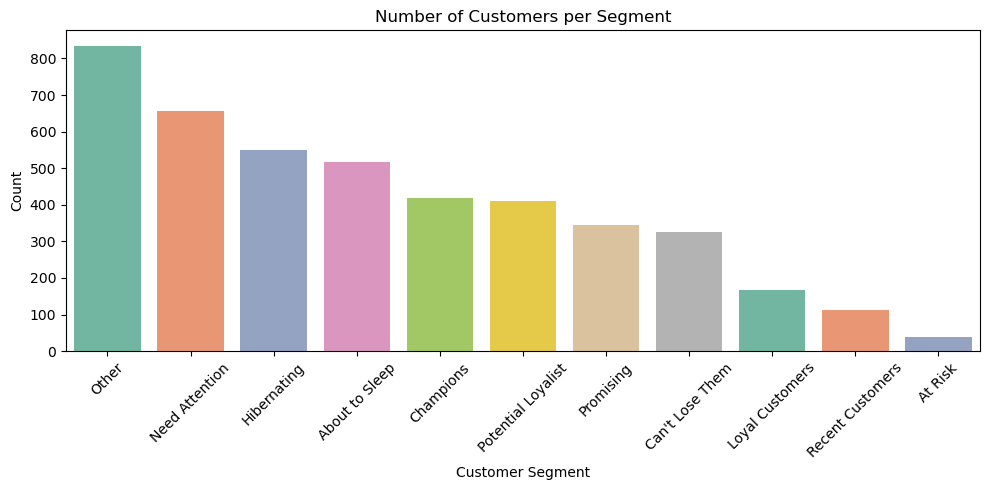

In [93]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df1, x='Segment', order=df1['Segment'].value_counts().index, palette='Set2')
plt.title("Number of Customers per Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

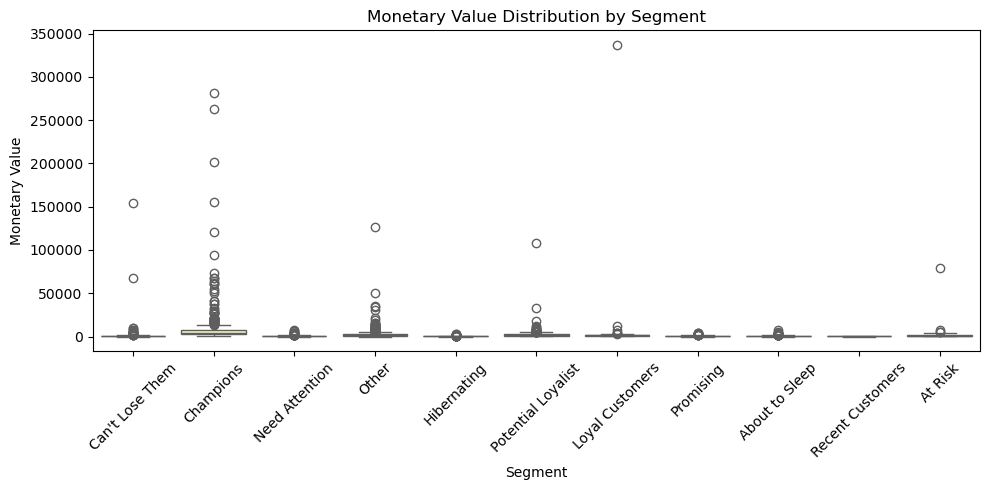

In [95]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df1, x='Segment', y='monetary', palette='Set3')
plt.title("Monetary Value Distribution by Segment")
plt.xlabel("Segment")
plt.ylabel("Monetary Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

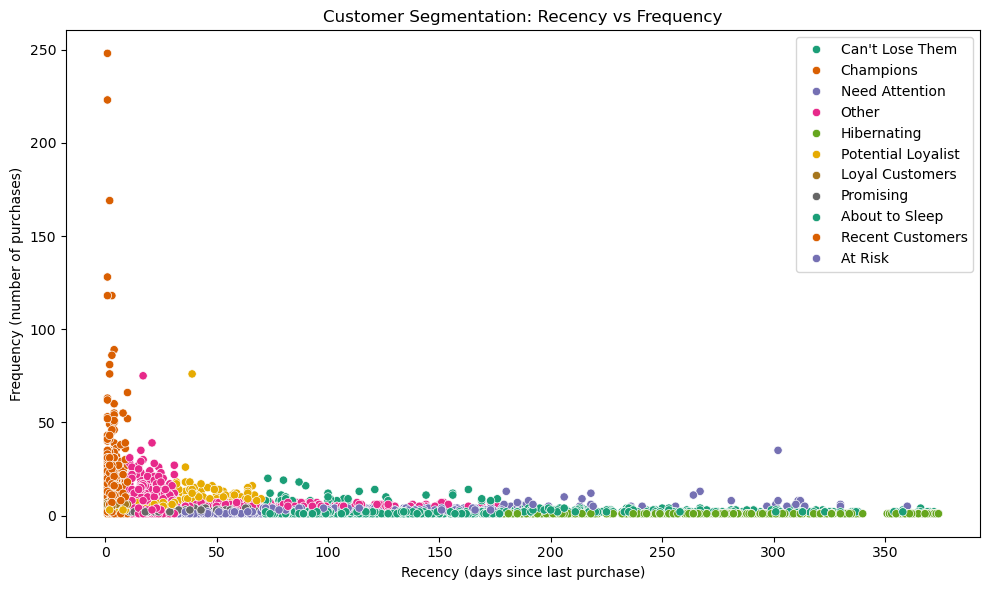

In [97]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='recency', y='frequency', hue='Segment', palette='Dark2')
plt.title("Customer Segmentation: Recency vs Frequency")
plt.xlabel("Recency (days since last purchase)")
plt.ylabel("Frequency (number of purchases)")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## findings:
1. Customer Segmentation Summary

   555 are the best customer for retails store and falls into campion segment : These are your most valuable customers with avg monetary value of 9873.     They purchased recently, shop frequently, and spend the most.

   This retail store needs to pay attention at risk segment because their avg monetary value is 3670 which is way above than avg of all segment ,           frequency is also decent but thier avg recency is 241 which needs to be addressed by the retail store.

   545 / 535 / 455 (Potential Loyalist, Promosing): These segment customers have visited very recently, they are frequent also but loyalist avg recency     is less about 5.44 which is good but for potential loyalist avg recency is 20 along with this they have low avg monetary value.

   323 / 233 (Can't lose them):  This segment avg recency is very high of about 231 days. which means they visited the store 231 days before and their      avg frequency is also low around 4 but their monetary avg monetary value is decent of about 1600.

   111 (Hibernating, about to sleep): Haven’t purchased in a long time, shop rarely, and contribute minimal avg revenue of 410.

   Others (1xx, x1x, xx1): Low in at least one of the three areas. Either they don't shop often, haven't done so recently, or don't spend much.

2. Revenue Contribution

   A small percentage of customers (e.g., 15–20%) often contribute a large portion (60–80%) of total sales — showing a classic Pareto Principle.

   Segments like 555 and 545 have the highest avg monetary values of 2532424.29 , making them ideal for loyalty programs and exclusive offers.

3. Recency Trends

   Many customers haven't made a purchase in over 200+ days segments like at risk, can't lose them and hibernating , indicating the need for                reactivation campaigns (e.g., email marketing with discounts).

   A segment with high frequency and monetary value but lower recency is worth re-engaging.

4. Monetary Value Patterns

   Some customers (e.g., in segment 415 or 335) have high spending but purchase infrequently. Consider targeting them with bundled offers or                personalized promotions to increase purchase frequency.

5. Strategic Recommendations

   Reward Best Customers (555) with loyalty benefits to retain them.

   Re-engage Lapsed Customers (111, 112, etc.) with win-back campaigns.

   Nurture Potential Loyalists (434, 344, etc.) through newsletters and product recommendations.

   Avoid Overspending on segments with low potential unless their behavior improves.